⬇️ Downloading Medical Insurance dataset...
Using Colab cache for faster access to the 'insurance' dataset.
Dataset Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Created Binary Target: 1 = Charges > $9382.03, 0 = Charges <= $9382.03

Accuracy: 0.8992537313432836

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       134
           1       0.88      0.92      0.90       134

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



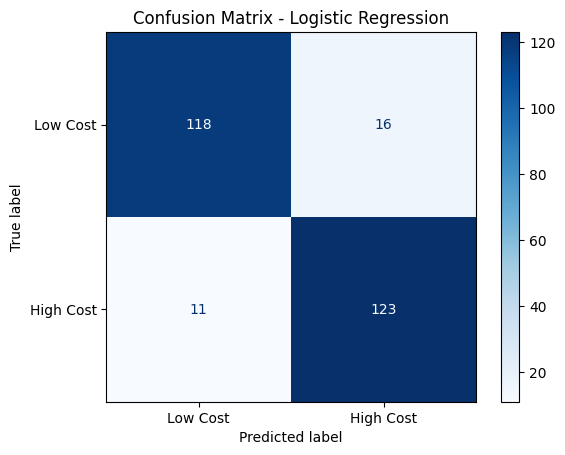

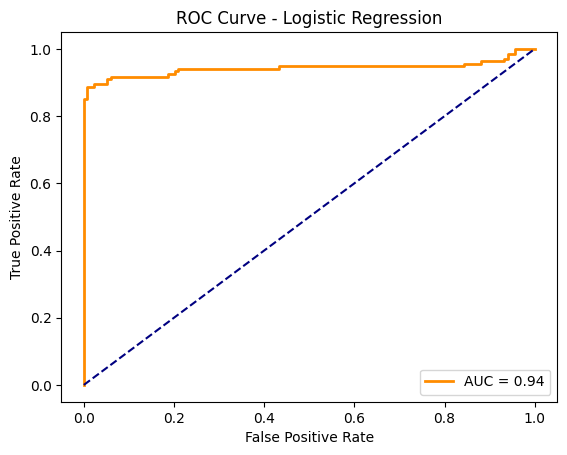

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Tuned Model Accuracy: 0.8992537313432836


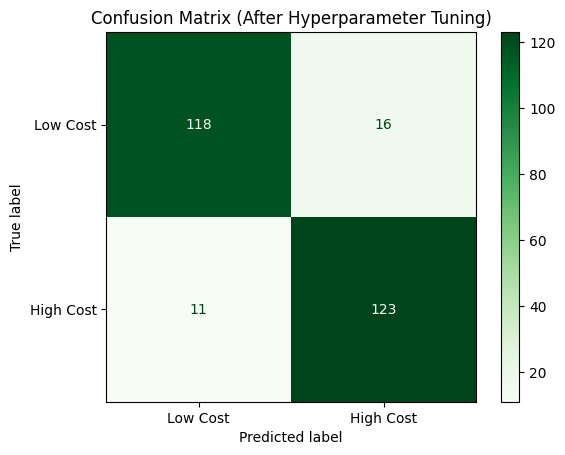

In [ ]:
# Install dependency
!pip install kagglehub[pandas-datasets]

# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# -------------------------
# 1. Load Dataset
# -------------------------
print("⬇️ Downloading Medical Insurance dataset...")
path = kagglehub.dataset_download("mirichoi0218/insurance")

import os
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

print("Dataset Shape:", df.shape)
display(df.head())

# -------------------------
# 2. Data Preprocessing
# -------------------------
# CONVERSION: The original target 'charges' is continuous (numbers).
# Logistic Regression needs Categories (0 or 1).
# We define "High Cost" (1) as charges above the median, and "Low Cost" (0) as below.
median_charge = df['charges'].median()
df['cost_category'] = (df['charges'] > median_charge).astype(int)

print(f"\nCreated Binary Target: 1 = Charges > ${median_charge:.2f}, 0 = Charges <= ${median_charge:.2f}")

# Define Features (X) and Target (y)
X = df.drop(columns=['charges', 'cost_category'])
y = df['cost_category']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing Pipeline for Features
# - Numerical: 'age', 'bmi', 'children' -> Standard Scaler
# - Categorical: 'sex', 'smoker', 'region' -> One Hot Encoding
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Scale the features
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# -------------------------
# 3. Train Logistic Regression
# -------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# 4. Performance Metrics
# -------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------
# 5. Confusion Matrix (Visual)
# -------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Low Cost", "High Cost"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# -------------------------
# 6. ROC Curve (Visual)
# -------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# -------------------------
# 7. Hyperparameter Tuning
# -------------------------
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

# -------------------------
# Confusion Matrix After Tuning
# -------------------------
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(cm_best, display_labels=["Low Cost", "High Cost"])
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (After Hyperparameter Tuning)")
plt.show()

⬇️ Downloading Medical Insurance dataset...


/tmp/ipython-input-4280027257.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'insurance' dataset.
Dataset Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
R-squared Score: 0.7836


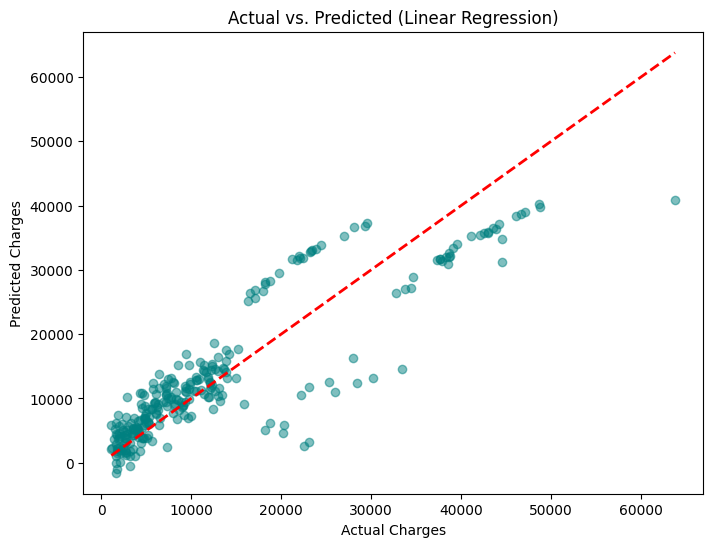

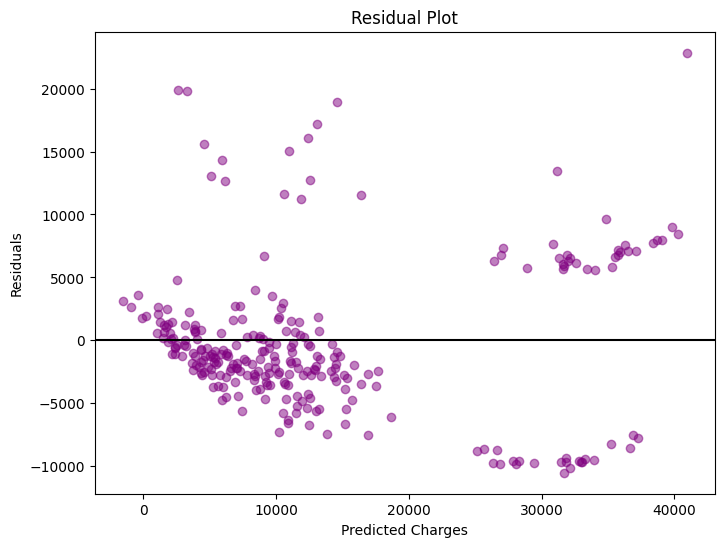


Top Positive Coefficients (Drivers of Cost):
smoker_yes    9558.481409
age           3614.975415
bmi           2036.228123
children       516.890247
sex_male        -9.293101
dtype: float64

Top Negative Coefficients (Reducers of Cost):
children            516.890247
sex_male             -9.293101
region_northwest   -158.140981
region_southeast   -290.157047
region_southwest   -349.110678
dtype: float64


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# -------------------------
# 1. Load Dataset
# -------------------------
print("⬇️ Downloading Medical Insurance dataset...")
file_path = "insurance.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mirichoi0218/insurance",
    file_path
)

print("Dataset Shape:", df.shape)
display(df.head())

# -------------------------
# 2. Data Preprocessing
# -------------------------
# The insurance dataset has categorical text columns (sex, smoker, region).
# We must convert them to numbers using One-Hot Encoding.
# drop_first=True avoids multicollinearity (dummy variable trap).
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale Features (Important for Linear Regression coefficients)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Train Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# -------------------------
# 4. Performance Metrics
# -------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

# -------------------------
# 5. Visualizations
# -------------------------

# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted (Linear Regression)")
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# -------------------------
# 6. Feature Importance (Coefficients)
# -------------------------
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nTop Positive Coefficients (Drivers of Cost):")
print(importance.head(5))

print("\nTop Negative Coefficients (Reducers of Cost):")
print(importance.tail(5))